In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [161]:
glacier_list=pd.read_csv('/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/preprocessing/Glacier_list.csv',header = 2)

In [162]:
print()

In [163]:
glacier_name = glacier_list['RGI index'].iloc[8]
min_n=5
max_n=100
print(glacier_name)

RGI60-15.07886


In [164]:
# plt.plot(res['run_10'])
# plt.plot(res['run_20'])

In [165]:
#####look at point by point
# run_name = 40

# for i in range(run_name):
#     result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/{i+1}_results.parquet')
#     fig,ax = plt.subplots(2,1)
#     fig.tight_layout()
#     ax[0].plot(result.Date,result.SWE)
#     ax[1].plot(result.Date,result.ICE-result.ICE.iloc[0])
#     ax[0].set_title(i+1)


In [166]:
###check weighting stategy works
#weights = [0.295871,0.163432,0.079678,0.198820,0.262198]
import datetime

mbs=[]

for run_name in np.arange(min_n,max_n+5,5):   
    weights_missed=0
    
    weights_df = pd.read_csv(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{int(run_name)}/Forcing_data/{glacier_name}/coords_out_{glacier_name}.csv',header=1)
    weights = np.array(weights_df.weight)
    print(run_name)
    for i in range(len(weights)):
        try:

            result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/Outputs/{glacier_name}/run_1.000/{i+1}_results.parquet')

            date_start = result.Date.iloc[0]
            date_spin_complete = date_start + datetime.timedelta(days = 365)
            date_end =date_spin_complete + datetime.timedelta(days = 365)
            result = result[(result.Date>date_spin_complete)&(result.Date<=date_end)]

            if i==0:
                snow = (result.SWE-result.SWE.iloc[0])*weights[i]
                ice = (result.ICE-result.ICE.iloc[0])*weights[i]

            else:
                snow += (result.SWE-result.SWE.iloc[0])*weights[i]
                ice += (result.ICE-result.ICE.iloc[0])*weights[i]
        except (IndexError,FileNotFoundError):
            weights_missed += weights[i]
            print(weights_missed)
            print(i)
    mbs_rescaled = (snow+ice).iloc[-1]/(1-weights_missed)
    mbs.append(mbs_rescaled)
    
   



5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


Text(0.5, 1.0, 'Response to N clusters: Whole glacier')

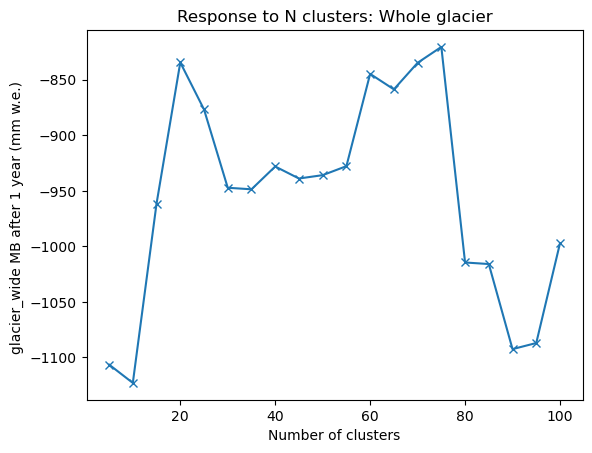

In [167]:
plt.plot(np.arange(min_n,max_n+5,5),mbs,'x',ls='-')
plt.xlabel('Number of clusters')
plt.ylabel('glacier_wide MB after 1 year (mm w.e.) ')
plt.title('Response to N clusters: Whole glacier')

In [177]:
###########now lets look at debris and clean ice separately

import datetime

mbs=[]
num_points=[]
for run_name in np.arange(min_n,max_n+5,5):   
    print(f'run: {run_name}')
    weights_missed=0
    
    weights_df = pd.read_csv(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{int(run_name)}/Forcing_data/{glacier_name}/coords_out_{glacier_name}.csv',header=1)
    weights = np.array(weights_df[weights_df['deb_bool']==0].weight)

    num_points.append(len(weights))
    for i in range(len(weights)):

        try:
            result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/Outputs/{glacier_name}/run_1.000/{i+1}_results.parquet')

            date_start = result.Date.iloc[0]
            date_spin_complete = date_start + datetime.timedelta(days = 365)
            date_end =date_spin_complete + datetime.timedelta(days = 365)
            result = result[(result.Date>date_spin_complete)&(result.Date<=date_end)]

            if i==0:
                snow = (result.SWE-result.SWE.iloc[0])*weights[i]
                ice = (result.ICE-result.ICE.iloc[0])*weights[i]

            else:
                snow += (result.SWE-result.SWE.iloc[0])*weights[i]
                ice += (result.ICE-result.ICE.iloc[0])*weights[i]
        except (FileNotFoundError,IndexError):
            weights_missed += weights[i]
            print(f'point_missing: {run_name} {i}')
            print(weights_missed)
    mbs_rescaled = (snow+ice).iloc[-1]/(1-weights_missed)
    mbs.append(mbs_rescaled)
    

run: 5
run: 10
run: 15
run: 20
run: 25
run: 30
run: 35
run: 40
run: 45
run: 50
run: 55
run: 60
run: 65
run: 70
run: 75
run: 80
run: 85
run: 90
run: 95
run: 100


Text(0.5, 1.0, 'Response to N clusters: clean ice')

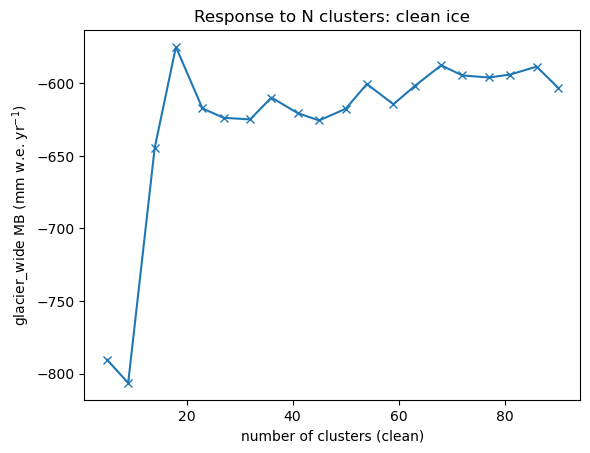

In [178]:
plt.plot(num_points,mbs,'x',ls='-')
plt.xlabel('number of clusters (clean)')
plt.ylabel(r'glacier_wide MB (mm w.e. yr$^{-1}$)')
plt.title('Response to N clusters: clean ice')

In [182]:
###########now lets look at debris and clean ice separately

import datetime

mbs=[]
num_points=[]
for run_name in np.arange(min_n,max_n+5,5):   
    weights_missed=0
    
    weights_df = pd.read_csv(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{int(run_name)}/Forcing_data/{glacier_name}/coords_out_{glacier_name}.csv',header=1)
    weights = np.array(weights_df[weights_df['deb_bool']==1].weight)
    print(f'{run_name}: {weights}')
    clean_points = len(weights_df[weights_df['deb_bool']==0])
    num_points.append(len(weights))
    for i in range(len(weights)):
        try:
            result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/Outputs/{glacier_name}/run_1.000/{i+1}_results.parquet')

            date_start = result.Date.iloc[0]
            date_spin_complete = date_start + datetime.timedelta(days = 365)
            date_end =date_spin_complete + datetime.timedelta(days = 365)
            result = result[(result.Date>date_spin_complete)&(result.Date<=date_end)]

            if i==0:
                snow = (result.SWE-result.SWE.iloc[0])*weights[i]
                ice = (result.ICE-result.ICE.iloc[0])*weights[i]

            else:
                snow += (result.SWE-result.SWE.iloc[0])*weights[i]
                ice += (result.ICE-result.ICE.iloc[0])*weights[i]
        except (IndexError,FileNotFoundError):
            weights_missed += weights[i]
            print(weights_df.deb_thickness_m.iloc[i+clean_points])
            print(weights_missed)
    mbs_rescaled = (snow+ice).iloc[-1]/(1-weights_missed)
    mbs.append(mbs_rescaled)
    

5: [0.10010323]
10: [0.10025524]
15: [0.10035251]
20: [0.08214121]
25: [0.0821385]
30: [0.07612127 0.00818756]
35: [0.07618891 0.00819483]
40: [0.02227926 0.00760194 0.05449699]
45: [0.02228    0.00760219 0.05449878]
50: [0.01247408 0.00743837 0.04841523 0.01606161]
55: [0.01247162 0.0074369  0.04840567 0.01605844]
60: [0.01239899 0.006314   0.04717506 0.01570321 0.00830961]
65: [0.01239818 0.00631359 0.04717197 0.01570218 0.00830907]
70: [0.01226061 0.00543478 0.00624353 0.04664855 0.01552795 0.00821687
 0.00559653]
75: [0.0122614  0.00543513 0.00624393 0.04665157 0.01552896 0.00821741
 0.00559689]
80: [0.01342608 0.00543513 0.00592041 0.03358137 0.00595277 0.0276933
 0.00232934 0.00559689]
85: [0.01342608 0.00543513 0.00592041 0.03358137 0.00595277 0.0276933
 0.00232934 0.00559689]
90: [0.0130702  0.00543513 0.00592041 0.02646393 0.00595277 0.0301197
 0.00232934 0.00559689 0.00504691]
95: [0.01306978 0.00543496 0.00592022 0.02646307 0.00595257 0.03011873
 0.00232927 0.00559671 0.0050

Text(0.5, 1.0, 'Response to N clusters: debris covered')

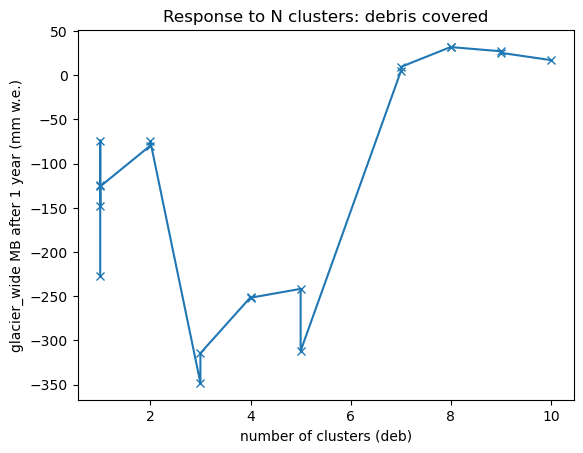

In [184]:
plt.plot(num_points,mbs,'x',ls='-')
plt.xlabel('number of clusters (deb)')
plt.ylabel('glacier_wide MB after 1 year (mm w.e.)')
plt.title('Response to N clusters: debris covered')

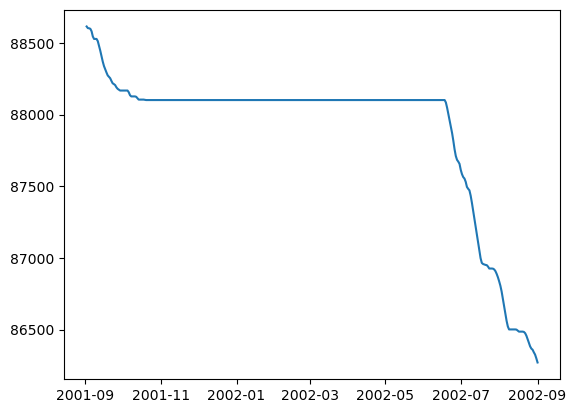

In [181]:
plt.plot(result.Date,result.ICE)

In [173]:
df_in=pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/100/Forcing_data/{glacier_list['RGI index'].iloc[1]}/1.parquet')

In [174]:
df_in[df_in.time.dt.month==12].head(50)

,time,PP,Ws,Sp,LWIN,RH,TA,SAD1,SAD2,SAB1,SAB2,PARB,PARD
2184,2000-12-01 00:00:00,0.000000,0.237066,641.318980,126.593510,19.987730,-23.517065,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2185,2000-12-01 01:00:00,0.000000,0.267307,640.992983,127.654350,18.766918,-23.328579,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2186,2000-12-01 02:00:00,0.000000,0.275439,640.806694,127.300736,18.126086,-23.228153,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2187,2000-12-01 03:00:00,0.000000,0.276981,640.834693,126.947123,17.678682,-23.155442,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2188,2000-12-01 04:00:00,0.000000,0.276943,640.424714,126.593510,17.590586,-23.161607,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2189,2000-12-01 05:00:00,0.000000,0.269542,640.471314,126.416704,17.480308,-23.143003,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2190,2000-12-01 06:00:00,0.000000,0.261130,640.471650,125.979564,17.584718,-22.611631,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000
2191,2000-12-01 07:00:00,0.000000,0.248624,640.462356,125.709477,17.753460,-22.574571,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2192,2000-12-01 08:00:00,0.000000,0.221458,640.499714,125.886284,17.994565,-22.435545,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2193,2000-12-01 09:00:00,0.000000,0.196834,640.723771,126.770317,18.342718,-21.745032,38.772401,20.338242,3.570141e+01,8.962312e+01,3.487544e+01,32.870893


In [175]:
#look at the results

df_out = pd.read_parquet('/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/50/Outputs/RGI60-13.31763/run_1.000/1_results.parquet')

In [176]:
df_out[np.isnan(df_out.SWE)==True]

,Date,EICE,ESN,SND,SWE,Ta,Ws,U,N,Rsw,Pre,Pr,Pr_sno,Albedo,Smelt,Imelt,SSN,ICE,ET,ros
